In [5]:
from openmdao.test_suite.components.sellar import SellarDerivativesGrouped
from openmdao.utils.assert_utils import assert_near_equal, assert_warning
import openmdao.api as om

import numpy as np

import pandas as pd
import hvplot.pandas # Adds .hvplot and .interactive methods to Pandas dataframes
import panel as pn # Panel is a simple, flexible and enterprise-ready data app framework\

In [6]:
pn.extension(sizing_mode="stretch_width")
pd.set_option("precision", 0)

PALETTE = ["#ff6f69", "#ffcc5c", "#88d8b0", ]
ACCENT_BASE_COLOR = PALETTE[0]

In [7]:
prob = om.Problem()
model = prob.model = SellarDerivativesGrouped(nonlinear_solver=om.NonlinearBlockGS,
                                              linear_solver=om.ScipyKrylov)

prob.driver = om.ScipyOptimizeDriver(optimizer='SLSQP', tol=1e-9, disp=False)

model.add_design_var('z', lower=np.array([-10.0, 0.0]), upper=np.array([10.0, 10.0]))
model.add_design_var('x', lower=0.0, upper=10.0)
model.add_objective('obj')
model.add_constraint('con1', upper=0.0)
model.add_constraint('con2', upper=0.0)

prob.setup(check=False, mode='rev')


driver = prob.driver
filename = "sellar_recording.sql"
recorder = om.SqliteRecorder(filename, record_viewer_data=False)
driver.recording_options['record_desvars'] = True
driver.recording_options['record_objectives'] = True
driver.recording_options['record_constraints'] = True
driver.recording_options['includes'] = []
driver.add_recorder(recorder)

In [8]:
failed = prob.run_driver()

NL: NLBGS Converged in 8 iterations


/Users/hschilli/Documents/OpenMDAO/dev/plot_opt_using_panel/openmdao/recorders/sqlite_recorder.py:227: UserWarning:The existing case recorder file, sellar_recording.sql, is being overwritten.


NL: NLBGS Converged in 1 iterations
NL: NLBGS Converged in 9 iterations
NL: NLBGS Converged in 10 iterations
NL: NLBGS Converged in 10 iterations
NL: NLBGS Converged in 9 iterations
NL: NLBGS Converged in 6 iterations


In [9]:
cr = om.CaseReader(filename)
driver_cases = cr.list_cases('driver', out_stream=None)

df = pd.DataFrame()


for i, iter_coord in enumerate(driver_cases):
    case = cr.get_case(iter_coord)
    for key, value in case.outputs.items():
        if key not in df.columns:
            df[key] = None  # None represents the initial values in the column
        df.loc[i, key] = np.linalg.norm(value)

In [10]:
df.head()

,z,x,con1,con2,obj
0,5,1,2e+01,1e+01,3e+01
1,5,1,2e+01,1e+01,3e+01
2,3,3e-15,5,2e+01,9
3,2,4e-17,0.6,2e+01,4
4,2,2e-14,0.02,2e+01,3


In [29]:
def pipeline(df=df):
    return (
        df
    )

In [18]:
line_width = pn.widgets.IntSlider(value=6, start=1, end=10, name="Line Width")
line_width

IntSlider(end=10, name='Line Width', sizing_mode='stretch_width', start=1, value=6)

In [26]:
variables = pn.widgets.CheckBoxGroup(
    name="Variables", value=['z',], options=list(df.columns)
)
# variables.servable(area="sidebar")

In [19]:
ipipeline = pipeline(df.interactive())

In [21]:
ihead = ipipeline.head()
ihead

In [28]:
ihvplot = ipipeline.hvplot(y=variables,responsive=True, min_height=400, color=PALETTE, line_width=line_width, yformatter="%.0f", title="Sellar Model Optimization using OpenMDAO")
ihvplot

Traceback (most recent call last): 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/plotting/util.py", line 280, in get_plot_frame 
 return map_obj[key] 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/spaces.py", line 1216, in __getitem__ 
 self._cache(tuple_key, val) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/spaces.py", line 1289, in _cache 
 self[key] = val 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 564, in __setitem__ 
 self._add_item(key, value, update=False) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 164, in _add_item 
 self._item_check(dim_vals, data) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 977, in _item_check 
 raise AssertionError("%s must only contain one type of object, not both %s and %s." % 
AssertionError: DynamicMap must only contain one type of object, not both NdOverlay and Curve. 
 
Traceback (most recent call last): 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/plotting/util.py", line 280, in get_plot_frame 
 return map_obj[key] 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/spaces.py", line 1216, in __getitem__ 
 self._cache(tuple_key, val) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/spaces.py", line 1289, in _cache 
 self[key] = val 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 564, in __setitem__ 
 self._add_item(key, value, update=False) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 164, in _add_item 
 self._item_check(dim_vals, data) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 977, in _item_check 
 raise AssertionError("%s must only contain one type of object, not both %s and %s." % 
AssertionError: DynamicMap must only contain one type of object, not both NdOverlay and Curve. 
 
Traceback (most recent call last): 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/plotting/util.py", line 280, in get_plot_frame 
 return map_obj[key] 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/spaces.py", line 1216, in __getitem__ 
 self._cache(tuple_key, val) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/spaces.py", line 1289, in _cache 
 self[key] = val 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 564, in __setitem__ 
 self._add_item(key, value, update=False) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 164, in _add_item 
 self._item_check(dim_vals, data) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/ndmapping.py", line 977, in _item_check 
 raise AssertionError("%s must only contain one type of object, not both %s and %s." % 
AssertionError: DynamicMap must only contain one type of object, not both NdOverlay and Curve. 
 
Traceback (most recent call last): 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/plotting/util.py", line 280, in get_plot_frame 
 return map_obj[key] 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/spaces.py", line 1216, in __getitem__ 
 self._cache(tuple_key, val) 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core/spaces.py", line 1289, in _cache 
 self[key] = val 
 File "/Users/hschilli/anaconda/envs/py38mpi4/lib/python3.8/site-packages/holoviews/core

In [22]:
pn.template.FastListTemplate(
    site="", title="OpenMDAO Dashboard using hvplot",
    sidebar=[line_width, variables],
    main=[ihead.panel(), ihvplot.panel()], 
    accent_base_color=ACCENT_BASE_COLOR,header_background=ACCENT_BASE_COLOR,
).servable();

In [12]:
# variable = pn.widgets.RadioBoxGroup(
#     name="Variable", value="z", options=list(df.columns)
# )
# variable.servable(area="sidebar")

RadioBoxGroup(name='Variable', options=['z', 'x', 'con1', ...], sizing_mode='stretch_width', value='z')

In [13]:
# def var_plot(variable="z"):
#     fig = Figure(figsize=(10, 5))
#     ax = fig.add_subplot()
#     df[variable].plot(ax=ax, c=primary_color)
#     return fig

ParamFunction(function, _pane=Matplotlib, sizing_mode='scale_both')
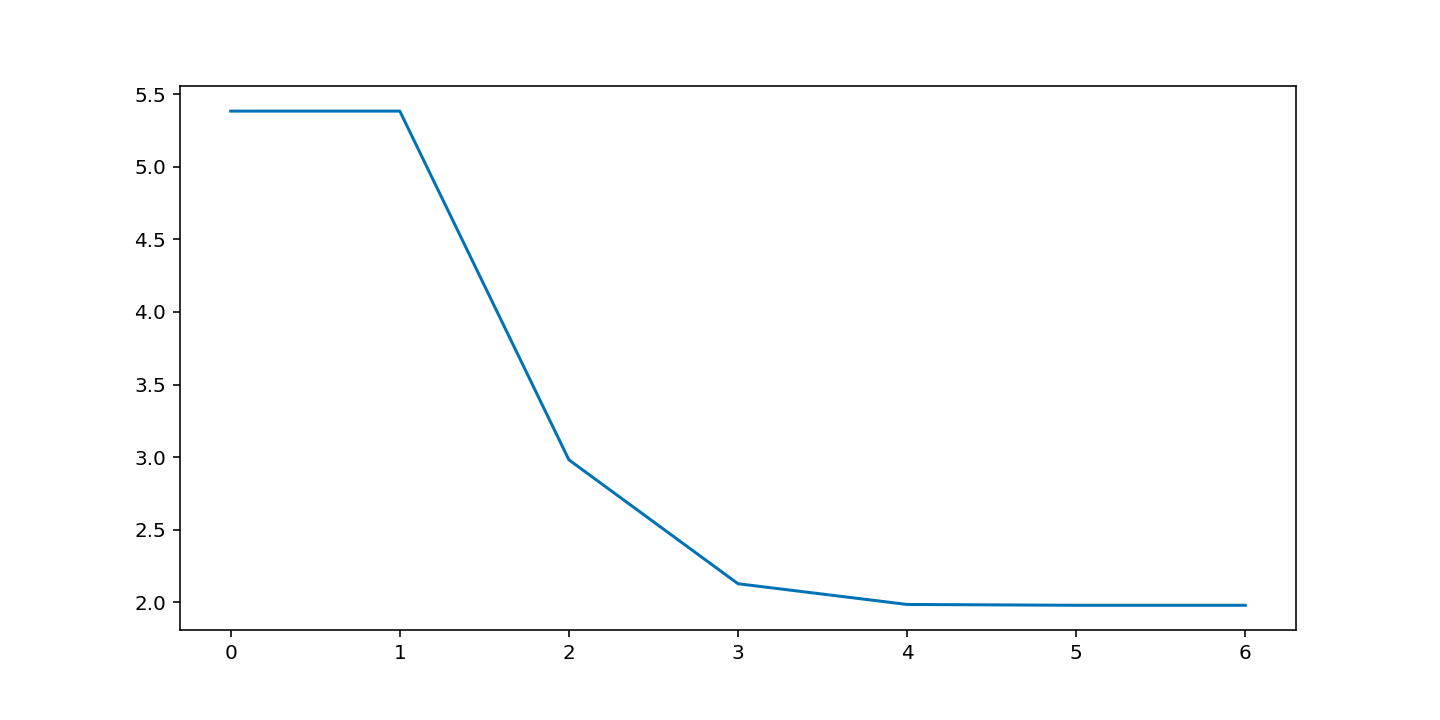

In [14]:
# # Reactive Functions
# reactive_plot = pn.bind(var_plot, variable)

# pn.panel(reactive_plot, sizing_mode="scale_both").servable()

CheckBoxGroup(name='Variables', options=['z', 'x', 'con1', ...], sizing_mode='stretch_width', value=['z'])

In [17]:
# def vars_plot(variables=["z",]):
#     fig = Figure(figsize=(10, 5))
#     ax = fig.add_subplot()
#     for variable in variables:
#         df[variable].plot(ax=ax, c=primary_color)
#     return fig

ParamFunction(function, _pane=Matplotlib, sizing_mode='scale_both')
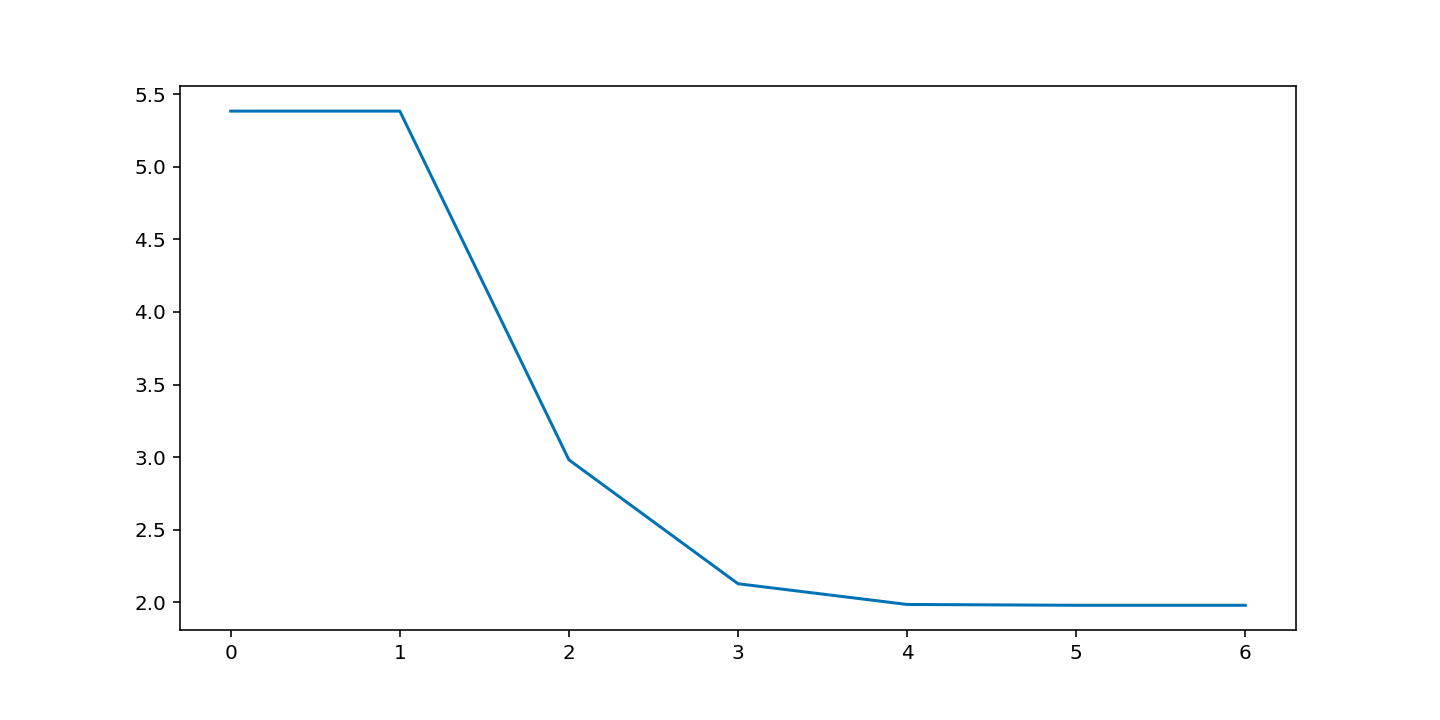

In [18]:
# # Reactive Functions
# reactive_plots = pn.bind(vars_plot, variables)

# pn.panel(reactive_plots, sizing_mode="scale_both").servable()